In [1]:
# WARNING: Use Julia 1.6 Kernel
include("./src/HomotopyOpt.jl")
using HomotopyContinuation

# Sextic Curve Optimization

Tracking 6 paths... 100%|███████████████████████████████| Time: 0:00:03
  # paths tracked:                  6
  # non-singular solutions (real):  6 (2)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         6 (2)


4-element Vector{Any}:
 [0.8580589368676115, -1.2483542602384992]
 [1.12405520030781, 0.22847964286974237]
 [0.3376897428559669, 1.3724475751307692]
 [0.4850450105073677, 0.994733055565597]

1.0

┌ Info: Saved animation to 
│   fn = C:\Users\matth\HomotopyOpt.jl\watch1.633590710381e9.gif
└ @ Plots C:\Users\matth\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\matth\\HomotopyOpt.jl\\watch1.633590710381e9.gif")
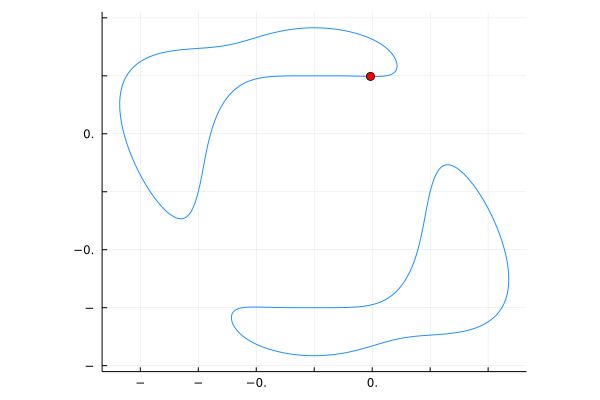

In [2]:
#TODO second order condition works properly?
#TODO saddle points pose an issue
@var x y
V = HomotopyOpt.ConstraintVariety([x,y], [(x^4 + y^4 - 1) * (x^2 + y^2 - 2) + x^5 * y], 2, 1, 200);
p0 = V.samples[1]# with certainty. How many converge to the correct answer?
objective(z) = (z[1]-0.5)^2+(z[2]-2)^2
allminima = []
amountofMinimal=0
for sample in V.samples
    resmin = HomotopyOpt.findminima(sample, 1e-3, V, objective; maxlocalsteps=1,maxseconds=100, whichstep="EDStep", initialstepsize=0.1);
    if resmin.lastpointisminimum
        amountofMinimal=amountofMinimal+1
        if isempty(filter(t-> norm(resmin.computedpoints[end] - t)<1e-2,allminima))
            push!(allminima,resmin.computedpoints[end])
            global resultminimum = resmin
        end
    else
        display(resmin.computedpoints[end])
    end
end
display(allminima)
println("Percentage of samples that converged to a minimum: ", amountofMinimal/length(V.samples))
HomotopyOpt.watch(resultminimum)

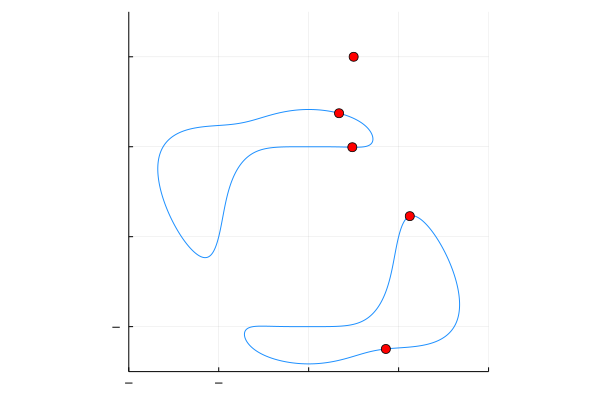

In [3]:
using Plots, ImplicitPlots
qup(x,y) = (x^4 + y^4 - 1) * (x^2 + y^2 - 2) + x^5 * y
plt = implicit_plot(qup; xlims=(-2,2), ylims=(-1.5,2.5), legend=false)
plt = Plots.scatter!(plt, [point[1] for point in vcat(allminima,[[0.5,2]])], [point[2] for point in vcat(allminima,[[0.5,2]])], legend=false, markersize=5, color=:red)

Tracking 36 paths... 100%|██████████████████████████████| Time: 0:00:03
  # paths tracked:                  36
  # non-singular solutions (real):  36 (8)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         36 (8)
[0.3373926886618538, 1.3725245972882842] is a minimum!
[1.1240441747445726, 0.22847575987119345] is a minimum!
[0.48448170167457527, 0.9947417043503567] is a minimum!
[0.8579036068098664, -1.2483713677874253] is a minimum!
The other points are either saddle points or maxima. Minima displayed in green, objective displayed in blue.


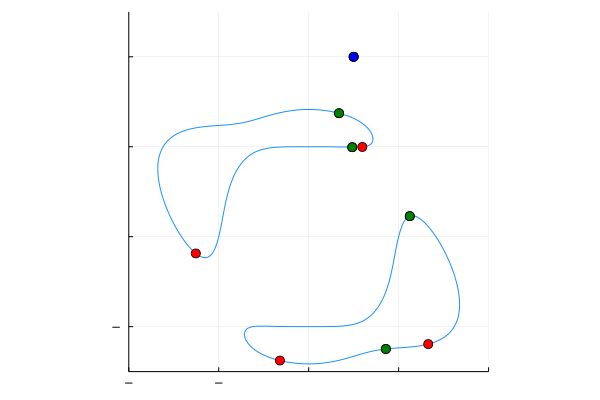

In [4]:
using LinearAlgebra
@var l
Lag = (x-0.5)^2+(y-2)^2+l*((x^4 + y^4 - 1) * (x^2 + y^2 - 2) + x^5 * y)
dL = HomotopyContinuation.differentiate(Lag,[x,y,l])
res = HomotopyContinuation.solve(dL, [x,y,l])
sols = HomotopyContinuation.real_solutions(res)
MinimalPoints=[]
for sol in sols
    HL = HomotopyContinuation.evaluate(HomotopyContinuation.differentiate(HomotopyContinuation.differentiate(Lag,[x,y]),[x,y]), [l,x,y]=>sol)
    dgp = HomotopyContinuation.evaluate(HomotopyContinuation.differentiate(((x^4 + y^4 - 1) * (x^2 + y^2 - 2) + x^5 * y), [x,y]), [l,x,y]=>sol)
    Qq,_ = LinearAlgebra.qr(dgp)
    Nq = Qq[:, 1] # O.N.B. for the normal space at q
    Tq = Qq[:, 2]
    projH = Tq'*HL*Tq
    projEigvals = real(LinearAlgebra.eigvals(projH))
    if(all(t-> t>1e-6, projEigvals))
        println(sol[2:3]," is a minimum!")
        push!(MinimalPoints, sol)
    end
end
println("The other points are either saddle points or maxima. Minima displayed in green, objective displayed in blue.")
plt = implicit_plot(qup; xlims=(-2,2), ylims=(-1.5,2.5), legend=false)
plt = Plots.scatter!(plt, [point[2] for point in vcat(sols,[[0,0.5,2]])], [point[3] for point in vcat(sols,[[0,0.5,2]])], legend=false, markersize=5, color=:red)
plt = Plots.scatter!(plt, [point[2] for point in vcat(MinimalPoints,[[0,0.5,2]])], [point[3] for point in vcat(MinimalPoints,[[0,0.5,2]])], legend=false, markersize=5, color=:green)
plt = Plots.scatter!(plt, [point[2] for point in [[0,0.5,2]]], [point[3] for point in [[0,0.5,2]]], legend=false, markersize=5, color=:blue)

Noteworthy difference between `EDStep` and `gaussnewtonstep`: `EDStep` stays on the same connected component, `gaussnewtonstep` does not necessarily do that. `EDSteps` takes fewer local steps; however, it takes a lot of steps in the backtracking line search, which `gaussnewtonstep` simply does not.

Furthermore, we find all local minima on the two components, provided we take sufficiently many sample points (cf. the two images).

Tracking 6 paths... 100%|███████████████████████████████| Time: 0:00:00
  # paths tracked:                  6
  # non-singular solutions (real):  0 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         0 (0)


2-element Vector{Any}:
 [0.8683181791688664, 0.8091300681116065]
 [0.868540997372641, -0.8094415330990333]

1.0

┌ Info: Saved animation to 
│   fn = C:\Users\matth\HomotopyOpt.jl\watch1.63359083238e9.gif
└ @ Plots C:\Users\matth\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\matth\\HomotopyOpt.jl\\watch1.63359083238e9.gif")
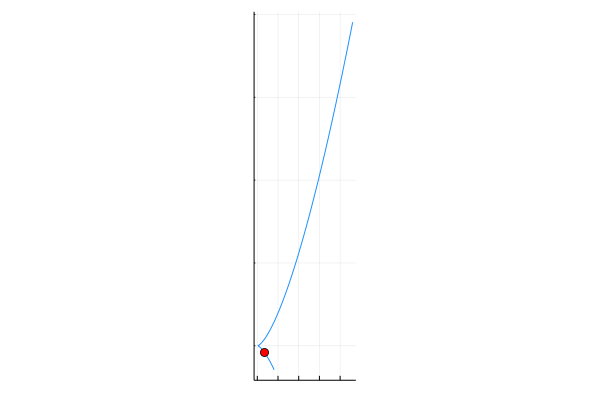

In [5]:
@var x y
V = HomotopyOpt.ConstraintVariety([x,y], [y^2-x^3], 2, 1, 70);
p0 = [1.,1]
objective(z) = (z[1]-2)^2+(z[2]-0)^2
amountofMinimal=0
allminima = []
for sample in V.samples
    resmin = HomotopyOpt.findminima(sample, 1e-3, V, objective; maxlocalsteps=5,maxseconds=30, whichstep="EDStep", initialstepsize=0.1);
    if resmin.lastpointisminimum
        amountofMinimal=amountofMinimal+1
        if isempty(filter(t-> norm(resmin.computedpoints[end] - t)<1e-2,allminima))
            push!(allminima,resmin.computedpoints[end])
            global resultminimum = resmin
        end
    else
        display(resmin.computedpoints[end])
    end
end
display(allminima)
println("Percentage of samples that converged to a minimum: ", amountofMinimal/length(V.samples))
HomotopyOpt.watch(resultminimum)

Conclusion: we need to do something about singularities. Maybe we should assume that we start with a regular point, compute the dimension from there and check for drops in dimension? gaussnewtonstep seems to have more problems here. To see that, try literally any other objective function whose optimum is not on the same 'arm' of the cuspidal cubic. 

Tracking 6 paths... 100%|███████████████████████████████| Time: 0:00:00
  # paths tracked:                  6
  # non-singular solutions (real):  0 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         0 (0)


2-element Vector{Any}:
 [-0.332909702997005, 0.2719059838215968]
 [-0.3329097029986773, -0.2719059838226218]

0.9797979797979798

┌ Info: Saved animation to 
│   fn = C:\Users\matth\HomotopyOpt.jl\watch1.63359129499e9.gif
└ @ Plots C:\Users\matth\.julia\packages\Plots\lzHOt\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\matth\\HomotopyOpt.jl\\watch1.63359129499e9.gif")
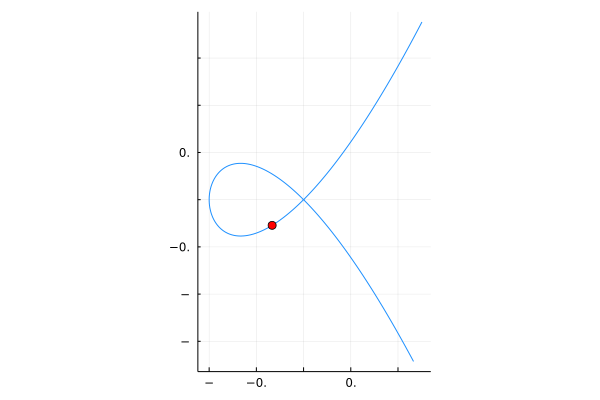

In [6]:
@var x y
V = HomotopyOpt.ConstraintVariety([x,y], [y^2-x^2*(x+1)], 2, 1, 100);
objective(z) = (z[1]+0.5)^2+(z[2])^2
allminima = []
amountofMinimal=0
for sample in V.samples
    resmin = HomotopyOpt.findminima(sample, 1e-3, V, objective; maxlocalsteps=5,maxseconds=30, whichstep="EDStep", initialstepsize=0.1);
    if resmin.lastpointisminimum
        amountofMinimal=amountofMinimal+1
        if isempty(filter(t-> norm(resmin.computedpoints[end] - t)<1e-2,allminima))
            push!(allminima,resmin.computedpoints[end])
            global resultminimum = resmin
        end
    else
        display(resmin.computedpoints)
    end
end
display(allminima)
println("Percentage of samples that converged to a minimum: ", amountofMinimal/length(V.samples))
HomotopyOpt.watch(resultminimum)

Tracking 7 paths... 100%|███████████████████████████████| Time: 0:00:04
  # paths tracked:                  7
  # non-singular solutions (real):  2 (2)
  # singular endpoints (real):      3 (3)
  # total solutions (real):         5 (5)
[-0.3333333333333333, -0.2721655269759087] is a minimum!
[-0.3333333333333333, 0.2721655269759087] is a minimum!
The other points are either saddle points or maxima. Minima displayed in green, objective displayed in blue.


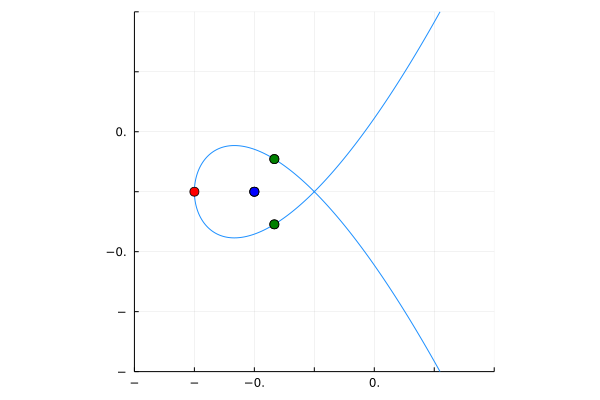

In [7]:
@var l
Lag = (x+0.5)^2+(y-0)^2+l*(y^2-x^2*(x+1))
dL = HomotopyContinuation.differentiate(Lag,[x,y,l])
res = HomotopyContinuation.solve(dL, [x,y,l])
sols = HomotopyContinuation.real_solutions(res)
MinimalPoints=[]
for sol in sols
    HL = HomotopyContinuation.evaluate(HomotopyContinuation.differentiate(HomotopyContinuation.differentiate(Lag,[x,y]),[x,y]), [l,x,y]=>sol)
    dgp = HomotopyContinuation.evaluate(HomotopyContinuation.differentiate((y^2-x^2*(x+1)), [x,y]), [l,x,y]=>sol)
    Qq,_ = LinearAlgebra.qr(dgp)
    Nq = Qq[:, 1] # O.N.B. for the normal space at q
    Tq = Qq[:, 2]
    projH = Tq'*HL*Tq
    projEigvals = real(LinearAlgebra.eigvals(projH))
    if(all(t-> t>1e-6, projEigvals))
        println(sol[2:3]," is a minimum!")
        push!(MinimalPoints, sol)
    end
end
println("The other points are either saddle points or maxima. Minima displayed in green, objective displayed in blue.")
qnodal=(y^2-x^2*(x+1))
plt = implicit_plot(qnodal; xlims=(-1.5,1.5), ylims=(-1.5,1.5), legend=false)
plt = Plots.scatter!(plt, [point[2] for point in vcat(sols,[[0,-0.5,0]])], [point[3] for point in vcat(sols,[[0,-0.5,0]])], legend=false, markersize=5, color=:red)
plt = Plots.scatter!(plt, [point[2] for point in vcat(MinimalPoints,[[0,-0.5,0]])], [point[3] for point in vcat(MinimalPoints,[[0,-0.5,0]])], legend=false, markersize=5, color=:green)
plt = Plots.scatter!(plt, [point[2] for point in [[0,-0.5,0]]], [point[3] for point in [[0,-0.5,0]]], legend=false, markersize=5, color=:blue)

Maybe the notion of an optimum that the gradient is supposed to be perpendicular to the constraint variety is only useful in regular points? In singularities, this notion becomes degenerate: The nodal cubic has a trivial normal space in (0,0), so every gradient is perpendicular there. This implies that we need some way to recognize and skip singularities.

In [ ]:
#Example to think about different-dimensional components
@var x y z
V = HomotopyOpt.ConstraintVariety([x,y,z],[x*z,x*y], 3, 2, 5);
p0 = V.samples[1]
objective(z) = (z[1]+1)^2+(z[2])^2+(z[3])^2
allminima = []
samples = filter(t->norm(t)<10, V.samples)
amountofMinimal=0
nonminpoints=[]
for sample in samples
    resmin = HomotopyOpt.findminima(sample, 1e-3, V, objective; maxlocalsteps=3, maxseconds=30, whichstep="EDStep", initialstepsize=0.1);
    if resmin.lastpointisminimum
        amountofMinimal=amountofMinimal+1
        if isempty(filter(t-> norm(resmin.computedpoints[end] - t)<1e-2,allminima))
            push!(allminima,resmin.computedpoints[end])
            global resultminimum = resmin
        end
    else
        push!(nonminpoints,resmin.computedpoints)
    end
end
display(nonminpoints)
display(allminima)
display(amountofMinimal/length(V.samples))
HomotopyOpt.watch(resultminimum; samples = (50,50,50))

Tracking 3 paths... 100%|███████████████████████████████| Time: 0:00:15
  # paths tracked:                  3
  # non-singular solutions (real):  1 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         1 (0)


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, -0.5511723006852869, 0.5257890592639779], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, -0.1837241002284289, 0.1752630197546592], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 0.5511723006852871, -0.5257890592639782], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 2.020965102512719, -1.927893217301253], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 4.960550706167583, -4.732101533375802], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 10.83972191347731, -10.340518165524902], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.5

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf



[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 187.21485813276914, -178.5930171299979], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, -0.3674482004568579, 0.3505260395093185], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 0.1837241002284291, -0.17526301975465963], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 1.286068701599003, -1.2268411382826159], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 3.490757904340151,

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


 -3.3299973753385284], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 7.900136309822447, -7.536309849450353], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 16.71889312078704, -15.948934797674003], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 34.356406742716224, -32.7741846941213], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 69.63143398657459, -66.42468448701591], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 140.1814884742913, -133.72

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-5.551115123125783e-17 + 0.0im, -0.9186205011421449 + 0.0im, 0.8763150987732966 + 0.0im, -0.0001087380033860285 + 0.0im, 0.00011398749069084697 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → Inf


, 0.8763150987732966], [-5.551115123125783e-17, 25.53764993175163, -24.361559745897647], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 51.993920364645405, -49.59943459056859], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 104.90646123043295, -100.07518427991049], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]
[-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966], [-5.551115123125783e-17, 210.73154296200804, -201.02668365859427], [-5.551115123125783e-17, -0.9186205011421449, 0.8763150987732966]


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, 72.31117330326867 + 0.0im, 69.16743126752444 + 0.0im]
 • t → 0.47095320964533216 + 0.0im
 • accuracy → 8.4687e-34
 • accepted_steps → 7
 • rejected_steps → 28
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


[6.105966881713337e-18, -0.9103196335232885, 0.8707387561749546], [6.105966881713337e-18, 0.31861187173315086, -0.30475856466123397], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 6.190095217906352, -5.920948656004596], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 12.640347800914343, -12.09074298352525], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 25.540852966930327, -24.430331638566557], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 51.34186329896229, -49.10950894864917], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[5.345529420184391e-51 + 0.0im, -0.26015736510163867 + 0.0im, 0.24884567151605783 + 0.0im, -0.00038400325238922356 + 0.0im, 0.00040145875844817876 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 77.14287363099425, -73.78868625873179], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 14.252910946666338, -13.633191565405411], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 28.765979258434317, -27.51522880232688], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 57.79211588197027, -55.27930327616982], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783], [5.345529420184391e-51, 21.50944510255033, -20.574210183866146], [5.345529420184391e-51, -0.26015736510163867, 0.24884567151605783]
[5

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.260687865715404e-17 + 0.0im, -0.2524771330620887 + 0.0im, 0.2424414513591067 + 0.0im, -0.0003957498949541716 + 0.0im, 0.0004121316644803152 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.260687865715404e-17 + 0.0im, -0.2524771330620887 + 0.0im, 0.2424414513591067 + 0.0im, -0.0003957498949541716 + 0.0im, 0.0004121316644803152 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.260687865715404e-17 + 0.0im, -0.2524771330620887 + 0.0im, 0.2424414513591067 + 0.0im, -0.0003957498949541716 + 0.0im, 0.0004121316644803152 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.260687865715404e-17 + 0.0im, -0.2524771330620887 + 0.0im, 0.2424414513591067 + 0.0im, -0.0003957498949541716 + 0.0im, 0.0004121316644803152 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


[-1.260687865715404e-17, -0.2524771330620887, 0.2424414513591067], [-1.260687865715404e-17, 47.28311863133367, -45.403667915328796], [-1.260687865715404e-17, -0.2524771330620887, 0.2424414513591067]
[-1.260687865715404e-17, -0.2524771330620887, 0.2424414513591067], [-1.260687865715404e-17, 94.81871439572943, -91.04977728201669], [-1.260687865715404e-17, -0.2524771330620887, 0.2424414513591067]
[-1.260687865715404e-17, -0.2524771330620887, 0.2424414513591067], [-1.260687865715404e-17, 71.05091651353155, -68.22672259867274], [-1.260687865715404e-17, -0.2524771330620887, 0.2424414513591067]
[-1.260687865715404e-17, -0.2524771330620887, 0.2424414513591067], [-1.260687865715404e-17, 100.73837609177339, -96.73413909228358], [-1.260687865715404e-17, -0.2524771330620887, 0.2424414513591067]


"We ran out of time... Try setting `maxseconds` to a larger value than 30"

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, 0.20270880294590127, 0.5655529807655115], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, 0.06756960098196707, 0.18851766025517047], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -0.20270880294590132, -0.5655529807655115], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -0.7432656108016381, -2.0736942628068755], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -1.8243792265131118, -5.089976826889604], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -3.986606457936059, -11.122541955055059], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -8.311060920781953, -23.187672211385973], [0.0, 0.33784800490983546, 0.9425883012758

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625



[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -68.85342340062448, -192.09949580001873], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, 0.1351392019639342, 0.37703532051034105], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -0.06756960098196707, -0.18851766025517036], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -0.4729872068737696, -1.3196236217861932], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -1.2838224186573748, -3.581835544848239], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -2.905492842224585, -8.10625939097233], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -6.148833689359005, -17.155107083220514], [0.0, 0.33784800490983546, 0.94258830127585

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.33784800490983546 + 0.0im, 0.9425883012758525 + 0.0im, 0.0001880261636007912 + 0.0im, 6.739343588011177e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625



[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -38.5822421607032, -107.64358400570234], [0.0, 0.33784800490983546, 0.9425883012758525]
[0.0, 0.33784800490983546, 0.9425883012758525], [0.0, -77.50233232631625, -216.2297563126805], [0.0, 0.33784800490983546, 0.9425883012758525]


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00024184431106969272 + 0.0im, -2.570811621783786e-5 + 0.0im]
 • t → 0.7036994585183483 + 0.0im
 • accuracy → 1.5632e-16
 • accepted_steps → 2
 • rejected_steps → 26
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.5046328359773205e-36 + 0.0im, 0.20527218519262908 + 0.0im, 0.5601237007036728 + 0.0im, -0.00031478656187473435 + 0.0im, -0.00011536188406975892 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0625


[-1.9250095116868e-17, 0.3421235765048744, 0.9335484181164524], [-1.9250095116868e-17, -0.11974325177670592, -0.3267419463407579], [-1.5046328359773205e-36, 0.20527218519262908, 0.5601237007036728]
[-1.5046328359773205e-36, 0.20527218519262908, 0.5601237007036728], [-1.5046328359773205e-36, -0.9494059146120801, -2.5906323054116775], [-1.5046328359773205e-36, 0.20527218519262908, 0.5601237007036728]
[-1.5046328359773205e-36, 0.20527218519262908, 0.5601237007036728], [-1.5046328359773205e-36, -2.1040840144167894, -5.741388311527028], [-1.5046328359773205e-36, 0.20527218519262908, 0.5601237007036728]
[-1.5046328359773205e-36, 0.20527218519262908, 0.5601237007036728], [-1.5046328359773205e-36, -4.413440214026208, -12.042900323757728], [-1.5046328359773205e-36, 0.20527218519262908, 0.5601237007036728]
[-1.5046328359773205e-36, 0.20527218519262908, 0.5601237007036728], [-1.5046328359773205e-36, -9.032152613245046, -24.64592434821913], [-1.5046328359773205e-36, 0.20527218519262908, 0.56012370

TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.19055236287631805 + 0.0im, 0.5091835965901192 + 0.0im, -0.5026074566844106 + 0.0im, 1.3419923909426958 + 0.0im]
 • t → 0.9982570570528826 + 0.0im
 • accuracy → 0.0
 • accepted_steps → 1
 • rejected_steps → 20
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.01966


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[7.523164458357239e-37 + 0.0im, 0.20587997459183058 + 0.0im, 0.5501412018521817 + 0.0im, -0.0003188832740186173 + 0.0im, -0.00011933733785603873 + 0.0im]
 • t → 0.9999999785242636 + 0.0im
 • accuracy → 1.3628e-15
 • accepted_steps → 2
 • rejected_steps → 25
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 1.3628e-15
 • τ → 0.0039062


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-5.642373174436648e-37 + 0.0im, 0.20588034977738384 + 0.0im, 0.5501422044024861 + 0.0im, -0.0003188831202672715 + 0.0im, -0.00011933599919318535 + 0.0im]
 • t → 0.9999999999277024 + 0.0im
 • accuracy → 6.4326e-33
 • accepted_steps → 7
 • rejected_steps → 33
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0019531


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[1.504632798337318e-36 + 0.0im, 0.20588035231975657 + 0.0im, 0.5501422111960753 + 0.0im, -0.0003188831171392556 + 0.0im, -0.00011933599562583743 + 0.0im]
 • t → 0.9999999999999878 + 0.0im
 • accuracy → 9.6566e-17
 • accepted_steps → 2
 • rejected_steps → 25
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.003125


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[1.504632798337318e-36 + 0.0im, 0.20588035231975657 + 0.0im, 0.5501422111960753 + 0.0im, -0.0003188831171413612 + 0.0im, -0.00011933599562038843 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.003125


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[1.504632798337318e-36 + 0.0im, 0.20588035231975657 + 0.0im, 0.5501422111960753 + 0.0im, -0.0003188831171413612 + 0.0im, -0.00011933599562038843 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.003125


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[1.504632798337318e-36 + 0.0im, 0.20588035231975657 + 0.0im, 0.5501422111960753 + 0.0im, -0.0003188831171413612 + 0.0im, -0.00011933599562038843 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.003125


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[1.504632798337318e-36 + 0.0im, 0.20588035231975657 + 0.0im, 0.5501422111960753 + 0.0im, -0.0003188831171413612 + 0.0im, -0.00011933599562038843 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.003125


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[1.504632798337318e-36 + 0.0im, 0.20588035231975657 + 0.0im, 0.5501422111960753 + 0.0im, -0.0003188831171413612 + 0.0im, -0.00011933599562038843 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.003125


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[1.504632798337318e-36 + 0.0im, 0.20588035231975657 + 0.0im, 0.5501422111960753 + 0.0im, -0.0003188831171413612 + 0.0im, -0.00011933599562038843 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.003125


[1.7040708953771764e-17, 0.20588035232061577, 0.5501422111983713], [1.7040708953771764e-17, -8.588434728186243, -22.949545300657327], [0.0, 0.19055236287631805, 0.5091835965901192]
[1.7040708953771764e-17, 0.20588035232061577, 0.5501422111983713], [1.7040708953771764e-17, -17.382749808693102, -46.449232812513024], [7.523164458357239e-37, 0.20587997459183058, 0.5501412018521817]
[1.7040708953771764e-17, 0.20588035232061577, 0.5501422111983713], [1.7040708953771764e-17, -34.971379969706824, -93.44860783622441], [-5.642373174436648e-37, 0.20588034977738384, 0.5501422044024861]
[1.7040708953771764e-17, 0.20588035232061577, 0.5501422111983713], [1.7040708953771764e-17, -70.14864029173425, -187.44735788364721], [1.504632798337318e-36, 0.20588035231975657, 0.5501422111960753]
[1.504632798337318e-36, 0.20588035231975657, 0.5501422111960753], [1.504632798337318e-36, -12.985592268495585, -34.69938905673458], [1.504632798337318e-36, 0.20588035231975657, 0.5501422111960753]
[1.504632798337318e-36,

TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-3.7615819357747215e-37 + 0.0im, 0.19594063130533498 + 0.0im, 0.5512802323025907 + 0.0im, -0.00032209697256583534 + 0.0im, -0.00011449517554298532 + 0.0im]
 • t → 0.9999997541847924 + 0.0im
 • accuracy → 1.5782e-16
 • accepted_steps → 3
 • rejected_steps → 26
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0039062


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.11756844903711325 + 0.0im, 0.33077959106723753 + 0.0im, -0.011531985079492199 + 0.0im, 0.030746537850174043 + 0.0im]
 • t → 0.9986127024073614 + 0.0im
 • accuracy → 1.3638e-44
 • accepted_steps → 2
 • rejected_steps → 21
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.00097678


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.11756844903711325 + 0.0im, 0.33077959106723753 + 0.0im, 0.0005368165532636392 + 0.0im, 0.00019079982952099978 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097678


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.11756844903711325 + 0.0im, 0.33077959106723753 + 0.0im, 0.0005368165532636392 + 0.0im, 0.00019079982952099978 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097678


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.11756844903711325 + 0.0im, 0.33077959106723753 + 0.0im, 0.0005368165532636392 + 0.0im, 0.00019079982952099978 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097678


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.11756844903711325 + 0.0im, 0.33077959106723753 + 0.0im, 0.0005368165532636392 + 0.0im, 0.00019079982952099978 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097678


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.11756844903711325 + 0.0im, 0.33077959106723753 + 0.0im, 0.0005368165532636392 + 0.0im, 0.00019079982952099978 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097678


[-2.0204215771498272e-16, 0.19594757530253476, 0.5512997692835828], [-3.221318071608469e-14, -28.052903529653616, -78.92702535233968], [-3.7615819357747215e-37, 0.19594063130533498, 0.5512802323025907]
[-2.0204215771498272e-16, 0.19594757530253476, 0.5512997692835828], [-6.422431927445439e-14, -56.301754634609765, -158.40535047396295], [0.0, 0.11756844903711325, 0.33077959106723753]
[0.0, 0.11756844903711325, 0.33077959106723753], [0.0, -46.909811165808186, -131.9810568358278], [0.0, 0.11756844903711325, 0.33077959106723753]
[0.0, 0.11756844903711325, 0.33077959106723753], [0.0, -46.909811165808186, -131.9810568358278], [0.0, 0.11756844903711325, 0.33077959106723753]
[0.0, 0.11756844903711325, 0.33077959106723753], [0.0, -46.909811165808186, -131.9810568358278], [0.0, 0.11756844903711325, 0.33077959106723753]
[0.0, 0.11756844903711325, 0.33077959106723753], [0.0, -46.909811165808186, -131.9810568358278], [0.0, 0.11756844903711325, 0.33077959106723753]
[0.0, 0.11756844903711325, 0.33077

TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-1.9848555311733035e-44 + 0.0im, 0.1210610810502514 + 0.0im, 0.32022751854884407 + 0.0im, -0.0005428412354489396 + 0.0im, -0.00021613162568197308 + 0.0im]
 • t → 0.9999891502398555 + 0.0im
 • accuracy → 2.5082e-16
 • accepted_steps → 5
 • rejected_steps → 29
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.5082e-16
 • τ → 9.3326e-5


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-1.9848555311733035e-44 + 0.0im, 0.1210610810502514 + 0.0im, 0.32022751854884407 + 0.0im, -0.0005464565862163388 + 0.0im, -0.0002065863214197482 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.6751e-9
 • accepted_steps → 0
 • rejected_steps → 25
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.3051e-14
 • μ → 1.6751e-9
 • τ → 0.0030135


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-1.9848555311733035e-44 + 0.0im, 0.1210610810502514 + 0.0im, 0.32022751854884407 + 0.0im, -0.0005464565862163388 + 0.0im, -0.0002065863214197482 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.6751e-9
 • accepted_steps → 0
 • rejected_steps → 25
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.3051e-14
 • μ → 1.6751e-9
 • τ → 0.0030135


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-1.9848555311733035e-44 + 0.0im, 0.1210610810502514 + 0.0im, 0.32022751854884407 + 0.0im, -0.0005464565862163388 + 0.0im, -0.0002065863214197482 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.6751e-9
 • accepted_steps → 0
 • rejected_steps → 25
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.3051e-14
 • μ → 1.6751e-9
 • τ → 0.0030135


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-1.9848555311733035e-44 + 0.0im, 0.1210610810502514 + 0.0im, 0.32022751854884407 + 0.0im, -0.0005464565862163388 + 0.0im, -0.0002065863214197482 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.6751e-9
 • accepted_steps → 0
 • rejected_steps → 25
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.3051e-14
 • μ → 1.6751e-9
 • τ → 0.0030135


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-1.9848555311733035e-44 + 0.0im, 0.1210610810502514 + 0.0im, 0.32022751854884407 + 0.0im, -0.0005464565862163388 + 0.0im, -0.0002065863214197482 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.6751e-9
 • accepted_steps → 0
 • rejected_steps → 25
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.3051e-14
 • μ → 1.6751e-9
 • τ → 0.0030135


[-1.980453987332708e-17, 0.12158876462322446, 0.3216233329566306], [-1.980453987332708e-17, -48.51391708466656, -128.32770984969565], [-1.9848555311733035e-44, 0.1210610810502514, 0.32022751854884407]
[-1.9848555311733035e-44, 0.1210610810502514, 0.32022751854884407], [-1.9848555311733035e-44, -48.30337133905031, -127.77077990098877], [-1.9848555311733035e-44, 0.1210610810502514, 0.32022751854884407]
[-1.9848555311733035e-44, 0.1210610810502514, 0.32022751854884407], [-1.9848555311733035e-44, -48.30337133905031, -127.77077990098877], [-1.9848555311733035e-44, 0.1210610810502514, 0.32022751854884407]
[-1.9848555311733035e-44, 0.1210610810502514, 0.32022751854884407], [-1.9848555311733035e-44, -48.30337133905031, -127.77077990098877], [-1.9848555311733035e-44, 0.1210610810502514, 0.32022751854884407]
[-1.9848555311733035e-44, 0.1210610810502514, 0.32022751854884407], [-1.9848555311733035e-44, -48.30337133905031, -127.77077990098877], [-1.9848555311733035e-44, 0.1210610810502514, 0.320227

TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[3.7615817139050855e-37 + 0.0im, 0.12369705726530032 + 0.0im, 0.3042853139690821 + 0.0im, -0.0005663512117732604 + 0.0im, -0.0002235715689513011 + 0.0im]
 • t → 0.9999375072932559 + 0.0im
 • accuracy → 4.8495e-16
 • accepted_steps → 2
 • rejected_steps → 24
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 4.8495e-16
 • τ → 0.0022321


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[3.7615817139050855e-37 + 0.0im, 0.12369705726530032 + 0.0im, 0.3042853139690821 + 0.0im, -0.0005640631449732952 + 0.0im, -0.00022930108007807628 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.7514e-10
 • accepted_steps → 0
 • rejected_steps → 19
 • extended_precision → true
 • extended_precision_used → true
 • ω → 4.0977e-6
 • μ → 1.7514e-10
 • τ → 5.4394e-5


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[3.7615817139050855e-37 + 0.0im, 0.12369705726530032 + 0.0im, 0.3042853139690821 + 0.0im, -0.0005640631449732952 + 0.0im, -0.00022930108007807628 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.7514e-10
 • accepted_steps → 0
 • rejected_steps → 19
 • extended_precision → true
 • extended_precision_used → true
 • ω → 4.0977e-6
 • μ → 1.7514e-10
 • τ → 5.4394e-5


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[3.7615817139050855e-37 + 0.0im, 0.12369705726530032 + 0.0im, 0.3042853139690821 + 0.0im, -0.0005640631449732952 + 0.0im, -0.00022930108007807628 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.7514e-10
 • accepted_steps → 0
 • rejected_steps → 19
 • extended_precision → true
 • extended_precision_used → true
 • ω → 4.0977e-6
 • μ → 1.7514e-10
 • τ → 5.4394e-5


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[3.7615817139050855e-37 + 0.0im, 0.12369705726530032 + 0.0im, 0.3042853139690821 + 0.0im, -0.0005640631449732952 + 0.0im, -0.00022930108007807628 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.7514e-10
 • accepted_steps → 0
 • rejected_steps → 19
 • extended_precision → true
 • extended_precision_used → true
 • ω → 4.0977e-6
 • μ → 1.7514e-10
 • τ → 5.4394e-5


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[3.7615817139050855e-37 + 0.0im, 0.12369705726530032 + 0.0im, 0.3042853139690821 + 0.0im, -0.0005640631449732952 + 0.0im, -0.00022930108007807628 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.7514e-10
 • accepted_steps → 0
 • rejected_steps → 19
 • extended_precision → true
 • extended_precision_used → true
 • ω → 4.0977e-6
 • μ → 1.7514e-10
 • τ → 5.4394e-5


[-3.7982379406706544e-18, 0.12686839707879483, 0.3120865677109731], [-3.7982379406706544e-18, -50.620490434439134, -124.52254051667826], [3.7615817139050855e-37, 0.12369705726530032, 0.3042853139690821]
[3.7615817139050855e-37, 0.12369705726530032, 0.3042853139690821], [3.7615817139050855e-37, -49.355125848854826, -121.40984027366375], [3.7615817139050855e-37, 0.12369705726530032, 0.3042853139690821]
[3.7615817139050855e-37, 0.12369705726530032, 0.3042853139690821], [3.7615817139050855e-37, -49.355125848854826, -121.40984027366375], [3.7615817139050855e-37, 0.12369705726530032, 0.3042853139690821]
[3.7615817139050855e-37, 0.12369705726530032, 0.3042853139690821], [3.7615817139050855e-37, -49.355125848854826, -121.40984027366375], [3.7615817139050855e-37, 0.12369705726530032, 0.3042853139690821]
[3.7615817139050855e-37, 0.12369705726530032, 0.3042853139690821], [3.7615817139050855e-37, -49.355125848854826, -121.40984027366375], [3.7615817139050855e-37, 0.12369705726530032, 0.30428531396

"We ran out of time... Try setting `maxseconds` to a larger value than 30"

TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-5.382856462247736e-51 + 0.0im, 1.1883326442067244 + 0.0im, 0.9543079979024198 + 0.0im, 0.1524780156587318 + 0.0im, -0.12261801487560206 + 0.0im]
 • t → 0.999999985427949 + 0.0im
 • accuracy → 2.0055e-14
 • accepted_steps → 1
 • rejected_steps → 23
 • extended_precision → true
 • extended_precision_used → true
 • ω → 0.1
 • μ → 2.0055e-14
 • τ → 0.013274


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-6.077163357286271e-64 + 0.0im, 1.1882164251758929 + 0.0im, 0.9542146665013413 + 0.0im, 1.940912274471349 + 0.0im, -1.558846431505414 + 0.0im]
 • t → 0.9998777426113614 + 0.0im
 • accuracy → 1.3685e-44
 • accepted_steps → 6
 • rejected_steps → 31
 • extended_precision → false
 • extended_precision_used → true
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.5


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-6.212404195110956e-50 + 0.0im, 1.1883326497166995 + 0.0im, 0.9543080023272862 + 0.0im, -0.5356579171647623 + 0.0im, 0.4299996612752056 + 0.0im]
 • t → 0.999999999254942 + 0.0im
 • accuracy → 2.9432e-13
 • accepted_steps → 1
 • rejected_steps → 23
 • extended_precision → false
 • extended_precision_used → true
 • ω → 0.1
 • μ → 1.1633e-12
 • τ → 0.20692


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[5.551115123125783e-17 + 0.0im, 1.188332651133302 + 0.0im, 0.9543080034649098 + 0.0im, -8.216740888588296e-5 + 0.0im, -0.00010231729639025882 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.2235e-17
 • accepted_steps → 0
 • rejected_steps → 24
 • extended_precision → true
 • extended_precision_used → true
 • ω → 3.9196e-6
 • μ → 2.2204e-16
 • τ → 0.29467


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[5.551115123125783e-17 + 0.0im, 1.188332651133302 + 0.0im, 0.9543080034649098 + 0.0im, -8.216740888588296e-5 + 0.0im, -0.00010231729639025882 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.2235e-17
 • accepted_steps → 0
 • rejected_steps → 24
 • extended_precision → true
 • extended_precision_used → true
 • ω → 3.9196e-6
 • μ → 2.2204e-16
 • τ → 0.15628


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[5.551115123125783e-17 + 0.0im, 1.188332651133302 + 0.0im, 0.9543080034649098 + 0.0im, -8.216740888588296e-5 + 0.0im, -0.00010231729639025882 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.2235e-17
 • accepted_steps → 0
 • rejected_steps → 23
 • extended_precision → true
 • extended_precision_used → true
 • ω → 3.9196e-6
 • μ → 2.2204e-16
 • τ → 0.03125


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[5.551115123125783e-17 + 0.0im, 1.188332651133302 + 0.0im, 0.9543080034649098 + 0.0im, -8.216740888588296e-5 + 0.0im, -0.00010231729639025882 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.2235e-17
 • accepted_steps → 0
 • rejected_steps → 22
 • extended_precision → true
 • extended_precision_used → true
 • ω → 3.9196e-6
 • μ → 2.2204e-16
 • τ → 0.016028


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[5.551115123125783e-17 + 0.0im, 1.188332651133302 + 0.0im, 0.9543080034649098 + 0.0im, -8.216740888588296e-5 + 0.0im, -0.00010231729639025882 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.2235e-17
 • accepted_steps → 0
 • rejected_steps → 22
 • extended_precision → true
 • extended_precision_used → true
 • ω → 3.9196e-6
 • μ → 2.2204e-16
 • τ → 0.019531


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[5.551115123125783e-17 + 0.0im, 1.188332651133302 + 0.0im, 0.9543080034649098 + 0.0im, -8.216740888588296e-5 + 0.0im, -0.00010231729639025882 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.2235e-17
 • accepted_steps → 0
 • rejected_steps → 20
 • extended_precision → true
 • extended_precision_used → true
 • ω → 3.9196e-6
 • μ → 2.2204e-16
 • τ → 0.0014107


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[3.559965744907647e-49 + 0.0im, 1.1883326511325454 + 0.0im, 0.9543080034643022 + 0.0im, 1.272365908638153 + 0.0im, -1.0219604491983805 + 0.0im]
 • t → 0.9999999999999969 + 0.0im
 • accuracy → 5.4832e-13
 • accepted_steps → 1
 • rejected_steps → 19
 • extended_precision → true
 • extended_precision_used → true
 • ω → 0.1
 • μ → 5.4832e-13
 • τ → 0.034096


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[3.559965744907647e-49 + 0.0im, 1.1883326511325454 + 0.0im, 0.9543080034643022 + 0.0im, -8.216740888593528e-5 + 0.0im, -0.00010231729639032398 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.3324e-9
 • accepted_steps → 0
 • rejected_steps → 27
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.927e-7
 • μ → 4.3324e-9
 • τ → 6.43


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-8.179412933880057e-59 + 0.0im, 0.758776644614202 + 0.0im, 0.6093467381435734 + 0.0im, 7.657507984327397e8 + 0.0im, -6.149474348847574e8 + 0.0im]
 • t → 0.6987684059478869 + 0.0im
 • accuracy → 2.4135e-17
 • accepted_steps → 61
 • rejected_steps → 115
 • extended_precision → true
 • extended_precision_used → true
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.66215


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.7552548408792236 + 0.0im, 0.6065185018852182 + 0.0im, -0.0001292440395776727 + 0.0im, -0.00016074155409658754 + 0.0im]
 • t → 0.998948690620706 + 0.0im
 • accuracy → 1.6863e-16
 • accepted_steps → 7
 • rejected_steps → 36
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.21164


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[4.636507688359277e-69 + 0.0im, 0.7569771207019705 + 0.0im, 0.6079016040136384 + 0.0im, -0.00012815607345984323 + 0.0im, -0.00016122019496918108 + 0.0im]
 • t → 0.9997314080355468 + 0.0im
 • accuracy → 5.1807e-49
 • accepted_steps → 4
 • rejected_steps → 30
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.016795


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[2.500357072979902e-42 + 0.0im, 0.7551444533826202 + 0.0im, 0.6064298535834228 + 0.0im, 4.813445373548081e9 + 0.0im, -3.865508062778216e9 + 0.0im]
 • t → 0.9997289345888851 + 0.0im
 • accuracy → 6.8638e-17
 • accepted_steps → 23
 • rejected_steps → 49
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.029216


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[1.9913648889155653e-59 + 0.0im, 0.646923258962684 + 0.0im, 0.5195212326000782 + 0.0im, -0.00015225119001582488 + 0.0im, -0.00018559779089437578 + 0.0im]
 • t → 0.9958262682175719 + 0.0im
 • accuracy → 1.2915e-39
 • accepted_steps → 2
 • rejected_steps → 22
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0043431


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-3.761581966091234e-37 + 0.0im, 0.6428454376349767 + 0.0im, 0.5162464782406657 + 0.0im, -0.0001516630544682335 + 0.0im, -0.0001892946231161225 + 0.0im]
 • t → 0.9999135129373976 + 0.0im
 • accuracy → 7.1595e-17
 • accepted_steps → 5
 • rejected_steps → 31
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0053745


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.582230849973902 + 0.0im, 0.4675690426114059 + 0.0im, -86695.30917842797 + 0.0im, 69621.94207574471 + 0.0im]
 • t → 0.9993139649856535 + 0.0im
 • accuracy → 0.0
 • accepted_steps → 2
 • rejected_steps → 19
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0038189


[5.551115123125783e-17, 1.188332651133302, 0.9543080034649098], [5.551115123125783e-17, 0.7129995906799813, 0.5725848020789459], [-5.382856462247736e-51, 1.1883326442067244, 0.9543079979024198]
[5.551115123125783e-17, 1.188332651133302, 0.9543080034649098], [5.551115123125783e-17, 0.2376665302266604, 0.19086160069298197], [-6.077163357286271e-64, 1.1882164251758929, 0.9542146665013413]
[5.551115123125783e-17, 1.188332651133302, 0.9543080034649098], [5.551115123125783e-17, -0.7129995906799813, -0.5725848020789459], [-6.212404195110956e-50, 1.1883326497166995, 0.9543080023272862]
[5.551115123125783e-17, 1.188332651133302, 0.9543080034649098], [5.551115123125783e-17, -2.6143318324932645, -2.0994776076228017], [5.551115123125783e-17, 1.188332651133302, 0.9543080034649098]
[5.551115123125783e-17, 1.188332651133302, 0.9543080034649098], [5.551115123125783e-17, -6.416996316119832, -5.153263218710514], [5.551115123125783e-17, 1.188332651133302, 0.9543080034649098]
[5.551115123125783e-17, 1.188

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.582230849973902 + 0.0im, 0.4675690426114059 + 0.0im, 0.00016770360904526458 + 0.0im, 0.0002088295116647944 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0038189


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.582230849973902 + 0.0im, 0.4675690426114059 + 0.0im, 0.00016770360904526458 + 0.0im, 0.0002088295116647944 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0038189


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.582230849973902 + 0.0im, 0.4675690426114059 + 0.0im, 0.00016770360904526458 + 0.0im, 0.0002088295116647944 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0038189


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.582230849973902 + 0.0im, 0.4675690426114059 + 0.0im, 0.00016770360904526458 + 0.0im, 0.0002088295116647944 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0038189


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.582230849973902 + 0.0im, 0.4675690426114059 + 0.0im, 0.00016770360904526458 + 0.0im, 0.0002088295116647944 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0038189


0.0, 0.582230849973902, 0.4675690426114059]
[0.0, 0.582230849973902, 0.4675690426114059], [0.0, -156.58277498898056, -125.7460991534828], [0.0, 0.582230849973902, 0.4675690426114059]
[0.0, 0.582230849973902, 0.4675690426114059], [0.0, -232.31010913958687, -186.56004800195095], [0.0, 0.582230849973902, 0.4675690426114059]
[0.0, 0.582230849973902, 0.4675690426114059], [0.0, -232.31010913958687, -186.56004800195095], [0.0, 0.582230849973902, 0.4675690426114059]
[0.0, 0.582230849973902, 0.4675690426114059], [0.0, -232.31010913958687, -186.56004800195095], [0.0, 0.582230849973902, 0.4675690426114059]
[0.0, 0.582230849973902, 0.4675690426114059], [0.0, -232.31010913958687, -186.56004800195095], [0.0, 0.582230849973902, 0.4675690426114059]


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.5148950614362895 + 0.0im, 0.4249270080501162 + 0.0im, -0.00022417410138122405 + 0.0im, -0.000203322736037726 + 0.0im]
 • t → 0.9997375142285677 + 0.0im
 • accuracy → 0.0
 • accepted_steps → 7
 • rejected_steps → 32
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0022375


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5148950614362895 + 0.0im, 0.4249270080501162 + 0.0im, 0.00019068709221924397 + 0.0im, 0.00023106048851513617 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0022375


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5148950614362895 + 0.0im, 0.4249270080501162 + 0.0im, 0.00019068709221924397 + 0.0im, 0.00023106048851513617 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0022375


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5148950614362895 + 0.0im, 0.4249270080501162 + 0.0im, 0.00019068709221924397 + 0.0im, 0.00023106048851513617 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0022375


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5148950614362895 + 0.0im, 0.4249270080501162 + 0.0im, 0.00019068709221924397 + 0.0im, 0.00023106048851513617 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0022375


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5148950614362895 + 0.0im, 0.4249270080501162 + 0.0im, 0.00019068709221924397 + 0.0im, 0.00023106048851513617 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0022375


[-3.638965574380469e-17, 0.5752980862225466, 0.47477576078043765], [-3.638965574380469e-17, -229.5439364027961, -189.43552855139464], [0.0, 0.5148950614362895, 0.4249270080501162]
[0.0, 0.5148950614362895, 0.4249270080501162], [0.0, -205.44312951307953, -169.54587621199636], [0.0, 0.5148950614362895, 0.4249270080501162]
[0.0, 0.5148950614362895, 0.4249270080501162], [0.0, -205.44312951307953, -169.54587621199636], [0.0, 0.5148950614362895, 0.4249270080501162]
[0.0, 0.5148950614362895, 0.4249270080501162], [0.0, -205.44312951307953, -169.54587621199636], [0.0, 0.5148950614362895, 0.4249270080501162]
[0.0, 0.5148950614362895, 0.4249270080501162], [0.0, -205.44312951307953, -169.54587621199636], [0.0, 0.5148950614362895, 0.4249270080501162]
[0.0, 0.5148950614362895, 0.4249270080501162], [0.0, -205.44312951307953, -169.54587621199636], [0.0, 0.5148950614362895, 0.4249270080501162]


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.180381838236617e-18 + 0.0im, 0.5151249414093109 + 0.0im, 0.4149296506393821 + 0.0im, -0.0001896733163891425 + 0.0im, -0.00023547475057834113 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 7.4351e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.8281e-9
 • μ → 7.4351e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.180381838236617e-18 + 0.0im, 0.5151249414093109 + 0.0im, 0.4149296506393821 + 0.0im, -0.0001896733163891425 + 0.0im, -0.00023547475057834113 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 7.4351e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.8281e-9
 • μ → 7.4351e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.180381838236617e-18 + 0.0im, 0.5151249414093109 + 0.0im, 0.4149296506393821 + 0.0im, -0.0001896733163891425 + 0.0im, -0.00023547475057834113 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 7.4351e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.8281e-9
 • μ → 7.4351e-9
 • τ → NaN


[-5.180381838236617e-18, 0.5151249414093109, 0.4149296506393821], [-5.180381838236617e-18, -205.53485162231505, -165.55693060511345], [-5.180381838236617e-18, 0.5151249414093109, 0.4149296506393821]
[-5.180381838236617e-18, 0.5151249414093109, 0.4149296506393821], [-5.180381838236617e-18, -205.53485162231505, -165.55693060511345], [-5.180381838236617e-18, 0.5151249414093109, 0.4149296506393821]
[-5.180381838236617e-18, 0.5151249414093109, 0.4149296506393821], [-5.180381838236617e-18, -205.53485162231505, -165.55693060511345], [-5.180381838236617e-18, 0.5151249414093109, 0.4149296506393821]


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.2776191554232257e-17 + 0.0im, 0.5157083569977031 + 0.0im, 0.4049466838333045 + 0.0im, -0.00018837492624279218 + 0.0im, -0.00023989954132387468 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.9762e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.00041165
 • μ → 4.9762e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.2776191554232257e-17 + 0.0im, 0.5157083569977031 + 0.0im, 0.4049466838333045 + 0.0im, -0.00018837492624279218 + 0.0im, -0.00023989954132387468 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.9762e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.00041165
 • μ → 4.9762e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.2776191554232257e-17 + 0.0im, 0.5157083569977031 + 0.0im, 0.4049466838333045 + 0.0im, -0.00018837492624279218 + 0.0im, -0.00023989954132387468 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 4.9762e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.00041165
 • μ → 4.9762e-9
 • τ → NaN


[-5.2776191554232257e-17, 0.5157083569977031, 0.4049466838333045], [-5.2776191554232257e-17, -205.76763444208356, -161.57372684948854], [-5.2776191554232257e-17, 0.5157083569977031, 0.4049466838333045]
[-5.2776191554232257e-17, 0.5157083569977031, 0.4049466838333045], [-5.2776191554232257e-17, -205.76763444208356, -161.57372684948854], [-5.2776191554232257e-17, 0.5157083569977031, 0.4049466838333045]
[-5.2776191554232257e-17, 0.5157083569977031, 0.4049466838333045], [-5.2776191554232257e-17, -205.76763444208356, -161.57372684948854], [-5.2776191554232257e-17, 0.5157083569977031, 0.4049466838333045]


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-1.1019289055448139e-44 + 0.0im, 0.5058436143128368 + 0.0im, 0.4069693682116467 + 0.0im, -0.00019315493157991812 + 0.0im, -0.0002399788612856417 + 0.0im]
 • t → 0.9999995751168107 + 0.0im
 • accuracy → 1.698e-16
 • accepted_steps → 1
 • rejected_steps → 22
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 1.5098e-5


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.1019289055448139e-44 + 0.0im, 0.5058436143128368 + 0.0im, 0.4069693682116467 + 0.0im, -0.000193104437703978 + 0.0im, -0.00024001965341339615 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 1.5098e-5


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.1019289055448139e-44 + 0.0im, 0.5058436143128368 + 0.0im, 0.4069693682116467 + 0.0im, -0.000193104437703978 + 0.0im, -0.00024001965341339615 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 1.5098e-5


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.1019289055448139e-44 + 0.0im, 0.5058436143128368 + 0.0im, 0.4069693682116467 + 0.0im, -0.000193104437703978 + 0.0im, -0.00024001965341339615 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 1.5098e-5


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.1019289055448139e-44 + 0.0im, 0.5058436143128368 + 0.0im, 0.4069693682116467 + 0.0im, -0.000193104437703978 + 0.0im, -0.00024001965341339615 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 1.5098e-5


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[-1.1019289055448139e-44 + 0.0im, 0.5058436143128368 + 0.0im, 0.4069693682116467 + 0.0im, -0.000193104437703978 + 0.0im, -0.00024001965341339615 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 1.5098e-5


[-4.4442165975969017e-17, 0.5059295987054201, 0.40703854574584025], [-4.4442165975969017e-17, -201.86590988346262, -162.4083797525903], [-1.1019289055448139e-44, 0.5058436143128368, 0.4069693682116467]
[-1.1019289055448139e-44, 0.5058436143128368, 0.4069693682116467], [-1.1019289055448139e-44, -201.83160211082188, -162.38077791644704], [-1.1019289055448139e-44, 0.5058436143128368, 0.4069693682116467]
[-1.1019289055448139e-44, 0.5058436143128368, 0.4069693682116467], [-1.1019289055448139e-44, -201.83160211082188, -162.38077791644704], [-1.1019289055448139e-44, 0.5058436143128368, 0.4069693682116467]
[-1.1019289055448139e-44, 0.5058436143128368, 0.4069693682116467], [-1.1019289055448139e-44, -201.83160211082188, -162.38077791644704], [-1.1019289055448139e-44, 0.5058436143128368, 0.4069693682116467]
[-1.1019289055448139e-44, 0.5058436143128368, 0.4069693682116467], [-1.1019289055448139e-44, -201.83160211082188, -162.38077791644704], [-1.1019289055448139e-44, 0.5058436143128368, 0.40696936

TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.487287418694444e-18 + 0.0im, 0.49654093586608417 + 0.0im, 0.41063817915204515 + 0.0im, -0.00019781373234897083 + 0.0im, -0.0002391950402433297 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.8453e-5
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.3062e-5
 • μ → 2.8453e-5
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.487287418694444e-18 + 0.0im, 0.49654093586608417 + 0.0im, 0.41063817915204515 + 0.0im, -0.00019781373234897083 + 0.0im, -0.0002391950402433297 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.8453e-5
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.3062e-5
 • μ → 2.8453e-5
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-5.487287418694444e-18 + 0.0im, 0.49654093586608417 + 0.0im, 0.41063817915204515 + 0.0im, -0.00019781373234897083 + 0.0im, -0.0002391950402433297 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.8453e-5
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.3062e-5
 • μ → 2.8453e-5
 • τ → NaN


[-5.487287418694444e-18, 0.49654093586608417, 0.41063817915204515], [-5.487287418694444e-18, -198.1198334105676, -163.84463348166602], [-5.487287418694444e-18, 0.49654093586608417, 0.41063817915204515]
[-5.487287418694444e-18, 0.49654093586608417, 0.41063817915204515], [-5.487287418694444e-18, -198.1198334105676, -163.84463348166602], [-5.487287418694444e-18, 0.49654093586608417, 0.41063817915204515]
[-5.487287418694444e-18, 0.49654093586608417, 0.41063817915204515], [-5.487287418694444e-18, -198.1198334105676, -163.84463348166602], [-5.487287418694444e-18, 0.49654093586608417, 0.41063817915204515]


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[1.1761876054530388e-17 + 0.0im, 0.48654324560537077 + 0.0im, 0.4108530964636748 + 0.0im, -0.0002026279539089869 + 0.0im, -0.00023995745241747372 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.127e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.00042913
 • μ → 1.127e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[1.1761876054530388e-17 + 0.0im, 0.48654324560537077 + 0.0im, 0.4108530964636748 + 0.0im, -0.0002026279539089869 + 0.0im, -0.00023995745241747372 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.127e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.00042913
 • μ → 1.127e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[1.1761876054530388e-17 + 0.0im, 0.48654324560537077 + 0.0im, 0.4108530964636748 + 0.0im, -0.0002026279539089869 + 0.0im, -0.00023995745241747372 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.127e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.00042913
 • μ → 1.127e-9
 • τ → NaN


[1.1761876054530388e-17, 0.48654324560537077, 0.4108530964636748], [1.1761876054530388e-17, -194.13075499654295, -163.93038548900623], [1.1761876054530388e-17, 0.48654324560537077, 0.4108530964636748]
[1.1761876054530388e-17, 0.48654324560537077, 0.4108530964636748], [1.1761876054530388e-17, -194.13075499654295, -163.93038548900623], [1.1761876054530388e-17, 0.48654324560537077, 0.4108530964636748]
[1.1761876054530388e-17, 0.48654324560537077, 0.4108530964636748], [1.1761876054530388e-17, -194.13075499654295, -163.93038548900623], [1.1761876054530388e-17, 0.48654324560537077, 0.4108530964636748]


"We ran out of time... Try setting `maxseconds` to a larger value than 30"

TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.6503563233077574 + 0.0im, 1.6969967888462583 + 0.0im, -0.4636338897465937 + 0.0im, 1.2094873132002144 + 0.0im]
 • t → 0.9375000000000342 + 0.0im
 • accuracy → 0.0
 • accepted_steps → 2
 • rejected_steps → 25
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 2.0


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.6658141394439725 + 0.0im, 1.7373313922100202 + 0.0im, -0.00010048337427619167 + 0.0im, -3.750383644155443e-5 + 0.0im]
 • t → 0.9977175255561536 + 0.0im
 • accuracy → 9.1257e-55
 • accepted_steps → 17
 • rejected_steps → 52
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 2.0371


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[1.8807909670748465e-37 + 0.0im, 0.6655742058741324 + 0.0im, 1.7367053254171516 + 0.0im, -0.00010033918199490564 + 0.0im, -3.826349897023629e-5 + 0.0im]
 • t → 0.9986339482973354 + 0.0im
 • accuracy → 1.9439e-17
 • accepted_steps → 3
 • rejected_steps → 29
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.62363


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.6657322450754874 + 0.0im, 1.737117702459705 + 0.0im, -0.00010053968632546405 + 0.0im, -3.7896517944436734e-5 + 0.0im]
 • t → 0.9993910144361796 + 0.0im
 • accuracy → 3.8799e-17
 • accepted_steps → 4
 • rejected_steps → 30
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.31189


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[1.1559086634130713e-45 + 0.0im, 0.6643353717344784 + 0.0im, 1.7334727935241525 + 0.0im, -0.00010069384570642026 + 0.0im, -3.8118724293349563e-5 + 0.0im]
 • t → 0.9993682944034868 + 0.0im
 • accuracy → 1.3553e-16
 • accepted_steps → 9
 • rejected_steps → 39
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.15562


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-2.3182538441796384e-69 + 0.0im, 0.6574287772999248 + 0.0im, 1.715451182666754 + 0.0im, -0.00010256102163499143 + 0.0im, -3.62573403932235e-5 + 0.0im]
 • t → 0.9988752241097547 + 0.0im
 • accuracy → 2.3737e-49
 • accepted_steps → 6
 • rejected_steps → 34
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.12264


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00012415770367308547 + 0.0im, -7.880444454215418e-6 + 0.0im]
 • t → 0.9960937485098806 + 0.0im
 • accuracy → 2.7101e-16
 • accepted_steps → 2
 • rejected_steps → 23
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.7101e-16
 • τ → 0.014262


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


[-8.326672684688674e-17, 0.6670321264694854, 1.740509527021779], [-1.27675647831893e-16, 0.4002192758816912, 1.0443057162130673], [0.0, 0.6503563233077574, 1.6969967888462583]
[-8.326672684688674e-17, 0.6670321264694854, 1.740509527021779], [-1.7208456881689927e-16, 0.133406425293897, 0.3481019054043557], [0.0, 0.6658141394439725, 1.7373313922100202]
[-8.326672684688674e-17, 0.6670321264694854, 1.740509527021779], [-2.609024107869118e-16, -0.40021927588169137, -1.0443057162130676], [1.8807909670748465e-37, 0.6655742058741324, 1.7367053254171516]
[-8.326672684688674e-17, 0.6670321264694854, 1.740509527021779], [-4.3853809472693685e-16, -1.4674706782328681, -3.829120959447914], [0.0, 0.6657322450754874, 1.737117702459705]
[-8.326672684688674e-17, 0.6670321264694854, 1.740509527021779], [-7.93809462606987e-16, -3.6019734829352217, -9.398751445917608], [1.1559086634130713e-45, 0.6643353717344784, 1.7334727935241525]
[-8.326672684688674e-17, 0.6670321264694854, 1.740509527021779], [-1.50435

TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


1.5664585079242872], [-4.584427988033945e-37, -227.07997993024432, -592.5274852298817], [-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872]
[-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872], [-4.584427988033945e-37, -42.0897290151143, -109.82615594291431], [-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872]
[-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872], [-4.584427988033945e-37, -84.77978691860584, -221.2187703937529], [-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872]
[-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872], [-4.584427988033945e-37, -170.1599027255889, -444.0039992954301], [-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872]
[-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872], [-4.584427988033945e-37, -63.43475796686008, -165.52246316833364], [-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872]
[-4.584427988033945e-37, 0.6003288883772252, 1.56645850792

TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-4.584427988033945e-37 + 0.0im, 0.6003288883772252 + 0.0im, 1.5664585079242872 + 0.0im, -0.00011132582806467816 + 0.0im, -4.266446271743355e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 3.3042e-9
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 2.8015e-7
 • μ → 3.3042e-9
 • τ → NaN


[-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872], [-4.584427988033945e-37, -191.50493167733472, -499.70030652084955], [-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872]
[-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872], [-4.584427988033945e-37, -143.4786165359067, -374.383615263656], [-4.584427988033945e-37, 0.6003288883772252, 1.5664585079242872]


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[3.133458521507747e-17 + 0.0im, 0.6038616218750668 + 0.0im, 1.5571033064816246 + 0.0im, -0.00011165154050837874 + 0.0im, -4.3299683492795246e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 0.00013048
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[3.133458521507747e-17 + 0.0im, 0.6038616218750668 + 0.0im, 1.5571033064816246 + 0.0im, -0.00011165154050837874 + 0.0im, -4.3299683492795246e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 0.00013048
 • μ → 3.3042e-9
 • τ → NaN


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[3.133458521507747e-17 + 0.0im, 0.6038616218750668 + 0.0im, 1.5571033064816246 + 0.0im, -0.00011165154050837874 + 0.0im, -4.3299683492795246e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 0.00013048
 • μ → 3.3042e-9
 • τ → NaN


[3.133458521507747e-17, 0.6038616218750668, 1.5571033064816246], [3.133458521507747e-17, -216.78634068158442, -559.0001345460314], [3.133458521507747e-17, 0.6038616218750668, 1.5571033064816246]
[3.133458521507747e-17, 0.6038616218750668, 1.5571033064816246], [3.133458521507747e-17, -240.94078712815164, -621.2842192861682], [3.133458521507747e-17, 0.6038616218750668, 1.5571033064816246]
[3.133458521507747e-17, 0.6038616218750668, 1.5571033064816246], [3.133458521507747e-17, -240.94078712815164, -621.2842192861682], [3.133458521507747e-17, 0.6038616218750668, 1.5571033064816246]


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[-2.3509885954223162e-37 + 0.0im, 0.5970182945309189 + 0.0im, 1.5226602469416164 + 0.0im, -0.00011213785413182671 + 0.0im, -4.898360794578778e-5 + 0.0im]
 • t → 0.9999598136982432 + 0.0im
 • accuracy → 6.7382e-17
 • accepted_steps → 2
 • rejected_steps → 24
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0024038


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.5140978043920816 + 0.0im, 1.311176385981334 + 0.0im, -0.00011791867070682953 + 0.0im, -8.815127704717278e-5 + 0.0im]
 • t → 0.9996527724070667 + 0.0im
 • accuracy → 0.0
 • accepted_steps → 4
 • rejected_steps → 25
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.0011381


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5140978043920816 + 0.0im, 1.311176385981334 + 0.0im, 0.0001322096861345488 + 0.0im, 5.183796023771998e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0011381


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5140978043920816 + 0.0im, 1.311176385981334 + 0.0im, 0.0001322096861345488 + 0.0im, 5.183796023771998e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0011381


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5140978043920816 + 0.0im, 1.311176385981334 + 0.0im, 0.0001322096861345488 + 0.0im, 5.183796023771998e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0011381


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5140978043920816 + 0.0im, 1.311176385981334 + 0.0im, 0.0001322096861345488 + 0.0im, 5.183796023771998e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.0011381


[6.517025294864131e-18, 0.6067718613784848, 1.547536148803795], [6.517025294864131e-18, -242.10197269001543, -617.4669233727142], [-2.3509885954223162e-37, 0.5970182945309189, 1.5226602469416164]
[-2.3509885954223162e-37, 0.5970182945309189, 1.5226602469416164], [-2.3509885954223162e-37, -238.21029951783663, -607.5414385297049], [0.0, 0.5140978043920816, 1.311176385981334]
[0.0, 0.5140978043920816, 1.311176385981334], [0.0, -205.12502395244056, -523.1593780065523], [0.0, 0.5140978043920816, 1.311176385981334]
[0.0, 0.5140978043920816, 1.311176385981334], [0.0, -205.12502395244056, -523.1593780065523], [0.0, 0.5140978043920816, 1.311176385981334]
[0.0, 0.5140978043920816, 1.311176385981334], [0.0, -205.12502395244056, -523.1593780065523], [0.0, 0.5140978043920816, 1.311176385981334]
[0.0, 0.5140978043920816, 1.311176385981334], [0.0, -205.12502395244056, -523.1593780065523], [0.0, 0.5140978043920816, 1.311176385981334]


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[1.6738174541283618e-18 + 0.0im, 0.5170859847416347 + 0.0im, 1.3016332849026189 + 0.0im, -0.0001327095520844928 + 0.0im, -5.272010958859674e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.3493e-6
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.4999e-5
 • μ → 1.3493e-6
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[1.6738174541283618e-18 + 0.0im, 0.5170859847416347 + 0.0im, 1.3016332849026189 + 0.0im, -0.0001327095520844928 + 0.0im, -5.272010958859674e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.3493e-6
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.4999e-5
 • μ → 1.3493e-6
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[1.6738174541283618e-18 + 0.0im, 0.5170859847416347 + 0.0im, 1.3016332849026189 + 0.0im, -0.0001327095520844928 + 0.0im, -5.272010958859674e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 1.3493e-6
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 1.4999e-5
 • μ → 1.3493e-6
 • τ → NaN


[1.6738174541283618e-18, 0.5170859847416347, 1.3016332849026189], [1.6738174541283618e-18, -206.31730791191222, -519.3516806761448], [1.6738174541283618e-18, 0.5170859847416347, 1.3016332849026189]
[1.6738174541283618e-18, 0.5170859847416347, 1.3016332849026189], [1.6738174541283618e-18, -206.31730791191222, -519.3516806761448], [1.6738174541283618e-18, 0.5170859847416347, 1.3016332849026189]
[1.6738174541283618e-18, 0.5170859847416347, 1.3016332849026189], [1.6738174541283618e-18, -206.31730791191222, -519.3516806761448], [1.6738174541283618e-18, 0.5170859847416347, 1.3016332849026189]


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-1.3334721765963058e-16 + 0.0im, 0.5217886566719265 + 0.0im, 1.2928080440154859 + 0.0im, -0.00013303121777232186 + 0.0im, -5.3692565372078445e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 8.0505e-11
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 4.7291e-17
 • μ → 8.0505e-11
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-1.3334721765963058e-16 + 0.0im, 0.5217886566719265 + 0.0im, 1.2928080440154859 + 0.0im, -0.00013303121777232186 + 0.0im, -5.3692565372078445e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 8.0505e-11
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 4.7291e-17
 • μ → 8.0505e-11
 • τ → NaN


TrackerResult:
 • return_code → terminated_max_steps
 • solution → ComplexF64[-1.3334721765963058e-16 + 0.0im, 0.5217886566719265 + 0.0im, 1.2928080440154859 + 0.0im, -0.00013303121777232186 + 0.0im, -5.3692565372078445e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 8.0505e-11
 • accepted_steps → 0
 • rejected_steps → 10000
 • extended_precision → false
 • extended_precision_used → false
 • ω → 4.7291e-17
 • μ → 8.0505e-11
 • τ → NaN


[-1.3334721765963058e-16, 0.5217886566719265, 1.2928080440154859], [-4.454226820266589e-14, -208.19367401209868, -515.8304095621788], [-1.3334721765963058e-16, 0.5217886566719265, 1.2928080440154859]
[-1.3334721765963058e-16, 0.5217886566719265, 1.2928080440154859], [-4.454226820266589e-14, -208.19367401209868, -515.8304095621788], [-1.3334721765963058e-16, 0.5217886566719265, 1.2928080440154859]
[-1.3334721765963058e-16, 0.5217886566719265, 1.2928080440154859], [-4.454226820266589e-14, -208.19367401209868, -515.8304095621788], [-1.3334721765963058e-16, 0.5217886566719265, 1.2928080440154859]


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.5225684832088033 + 0.0im, 1.2783553340403577 + 0.0im, -0.00013460169205050808 + 0.0im, -5.344624425106414e-5 + 0.0im]
 • t → 0.999990568975525 + 0.0im
 • accuracy → 1.3783e-16
 • accepted_steps → 6
 • rejected_steps → 31
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.00097656


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5225684832088033 + 0.0im, 1.2783553340403577 + 0.0im, 0.0001340507860541289 + 0.0im, 5.479753091799001e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097656


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5225684832088033 + 0.0im, 1.2783553340403577 + 0.0im, 0.0001340507860541289 + 0.0im, 5.479753091799001e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097656


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5225684832088033 + 0.0im, 1.2783553340403577 + 0.0im, 0.0001340507860541289 + 0.0im, 5.479753091799001e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097656


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5225684832088033 + 0.0im, 1.2783553340403577 + 0.0im, 0.0001340507860541289 + 0.0im, 5.479753091799001e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097656


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5225684832088033 + 0.0im, 1.2783553340403577 + 0.0im, 0.0001340507860541289 + 0.0im, 5.479753091799001e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00097656


[-2.714930404688184e-18, 0.5245472905429734, 1.2831960754779996], [-2.714930404688184e-18, -209.2943689266464, -511.99523411572187], [0.0, 0.5225684832088033, 1.2783553340403577]
[0.0, 0.5225684832088033, 1.2783553340403577], [0.0, -208.50482480031255, -510.0637782821027], [0.0, 0.5225684832088033, 1.2783553340403577]
[0.0, 0.5225684832088033, 1.2783553340403577], [0.0, -208.50482480031255, -510.0637782821027], [0.0, 0.5225684832088033, 1.2783553340403577]
[0.0, 0.5225684832088033, 1.2783553340403577], [0.0, -208.50482480031255, -510.0637782821027], [0.0, 0.5225684832088033, 1.2783553340403577]
[0.0, 0.5225684832088033, 1.2783553340403577], [0.0, -208.50482480031255, -510.0637782821027], [0.0, 0.5225684832088033, 1.2783553340403577]
[0.0, 0.5225684832088033, 1.2783553340403577], [0.0, -208.50482480031255, -510.0637782821027], [0.0, 0.5225684832088033, 1.2783553340403577]


TrackerResult:
 • return_code → terminated_step_size_too_small
 • solution → ComplexF64[0.0 + 0.0im, 0.5249081878658327 + 0.0im, 1.2686328702476206 + 0.0im, -0.00013460595808704307 + 0.0im, -5.569441990755768e-5 + 0.0im]
 • t → 0.9999999999414642 + 0.0im
 • accuracy → 0.0
 • accepted_steps → 2
 • rejected_steps → 23
 • extended_precision → false
 • extended_precision_used → false
 • ω → 0.1
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5249081878658327 + 0.0im, 1.2686328702476206 + 0.0im, 0.00013460595872110653 + 0.0im, 5.569441839737924e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5249081878658327 + 0.0im, 1.2686328702476206 + 0.0im, 0.00013460595872110653 + 0.0im, 5.569441839737924e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5249081878658327 + 0.0im, 1.2686328702476206 + 0.0im, 0.00013460595872110653 + 0.0im, 5.569441839737924e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5249081878658327 + 0.0im, 1.2686328702476206 + 0.0im, 0.00013460595872110653 + 0.0im, 5.569441839737924e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, 0.5249081878658327 + 0.0im, 1.2686328702476206 + 0.0im, 0.00013460595872110653 + 0.0im, 5.569441839737924e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


[-9.193250975622644e-18, 0.5249082001562103, 1.268632899951819], [-9.193250975622644e-18, -209.43837186232793, -506.1845270807758], [0.0, 0.5249081878658327, 1.2686328702476206]
[0.0, 0.5249081878658327, 1.2686328702476206], [0.0, -209.43836695846724, -506.1845152288006], [0.0, 0.5249081878658327, 1.2686328702476206]
[0.0, 0.5249081878658327, 1.2686328702476206], [0.0, -209.43836695846724, -506.1845152288006], [0.0, 0.5249081878658327, 1.2686328702476206]
[0.0, 0.5249081878658327, 1.2686328702476206], [0.0, -209.43836695846724, -506.1845152288006], [0.0, 0.5249081878658327, 1.2686328702476206]
[0.0, 0.5249081878658327, 1.2686328702476206], [0.0, -209.43836695846724, -506.1845152288006], [0.0, 0.5249081878658327, 1.2686328702476206]
[0.0, 0.5249081878658327, 1.2686328702476206], [0.0, -209.43836695846724, -506.1845152288006], [0.0, 0.5249081878658327, 1.2686328702476206]


"We ran out of time... Try setting `maxseconds` to a larger value than 30"

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, -1.7060927594994715, -0.5617119071895749], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, -0.5686975864998236, -0.18723730239652492], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 1.7060927594994721, 0.561711907189575], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 6.255673451498064, 2.0596103263617747], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 15.354834835495247, 5.055407164706175], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 33.55315760348961, 11.047000841394974], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 69.94980313947835, 23.03018819477257], [0.0, -2.8434879324991194, -0.93618651198

TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


TrackerResult:
 • return_code → terminated_invalid_startvalue_singular_jacobian
 • solution → ComplexF64[0.0 + 0.0im, -2.8434879324991194 + 0.0im, -0.9361865119826248 + 0.0im, -2.0892662726787073e-5 + 0.0im, -6.345747730928193e-5 + 0.0im]
 • t → 1.0 + 0.0im
 • accuracy → 2.2204e-16
 • accepted_steps → 0
 • rejected_steps → 0
 • extended_precision → true
 • extended_precision_used → true
 • ω → 1.0
 • μ → 2.2204e-16
 • τ → 0.00013112


0.0, 38.10273829548821, 12.544899260567174], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 79.04896452347553, 26.02598503311697], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 160.94141697945017, 52.98815657821657], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 324.7263218913995, 106.91249966841576], [0.0, -2.8434879324991194, -0.9361865119826248]
[0.0, -2.8434879324991194, -0.9361865119826248], [0.0, 652.2961317152981, 214.76118584881416], [0.0, -2.8434879324991194, -0.9361865119826248]


The algorithm does not seem to work for complete intersections! It remains stagnant in the starting point - the tracker does not compute another solution

In [ ]:
@var x y z
V = HomotopyOpt.ConstraintVariety([x,y,z],[z^2-y^2*(y+1)-x^2*(x+1)], 3, 2, 70);
p0 = V.samples[1]
objective(z) = (z[1]+0.5)^2+(z[2]+0.5)^2+(z[3])^2
allminima = []
amountofMinimal=0
for sample in V.samples
    resmin = HomotopyOpt.findminima(sample, 1e-3, V, objective; maxlocalsteps=10,maxseconds=50, whichstep="EDStep", initialstepsize=0.1);
    if resmin.lastpointisminimum
        amountofMinimal=amountofMinimal+1
        if isempty(filter(t-> norm(resmin.computedpoints[end] - t)<1e-2,allminima))
            push!(allminima,resmin.computedpoints[end])
            global resultminimum = resmin
        end
    end
end
display(allminima)
println("Percentage of samples that converged to a minimum: ", amountofMinimal/length(V.samples))
HomotopyOpt.watch(resultminimum; samples = (50,50,50))

In [ ]:
@var x y z
V = HomotopyOpt.ConstraintVariety([x,y,z],[z-x^2,x-y^2], 3, 1, 100);
p0 = V.samples[1]
objective(z) = (z[1]-1)^2+(z[2]-1)^2+(z[3]-1)^2 # optimum [1,1,1] is on the variety. Not Unique though?
allminima = []
amountofMinimal
for sample in V.samples
    global resmin = HomotopyOpt.findminima(sample, 1e-3, V, objective; maxlocalsteps=10,maxseconds=50, whichstep="EDStep", initialstepsize=0.1);
    if resmin.lastpointisminimum
        amountofMinimal=amountofMinimal+1
        if isempty(filter(t-> norm(resmin.computedpoints[end] - t)<1e-3,allminima))
            push!(allminima,resmin.computedpoints[end])
            global resultminimum = resmin
        end
    end
end
display(allminima)
println("Percentage of samples that converged to a minimum: ", amountofMinimal/length(V.samples))
HomotopyOpt.watch(resultminimum; samples = (50,50,50), in_line=true)